In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
filename = "data/cleaned_players_data.csv"
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df = pd.read_csv(filepath_or_buffer=filename, index_col=0)

In [3]:
df.describe()

,kills,deaths,assists,largestKillingSpree,largestMultiKill,doubleKills,tripleKills,quadraKills,pentaKills,visionScore,timeCCingOthers,turretKills,inhibitorKills,totalTimeCrowdControlDealt,champLevel,visionWardsBoughtInGame,wardsPlaced,wardsKilled,gameDuration,kda,totalDamageDealt_per_min,magicDamageDealt_per_min,physicalDamageDealt_per_min,trueDamageDealt_per_min,totalDamageDealtToChampions_per_min,magicDamageDealtToChampions_per_min,physicalDamageDealtToChampions_per_min,totalHeal_per_min,totalUnitsHealed_per_min,damageSelfMitigated_per_min,damageDealtToObjectives_per_min,damageDealtToTurrets_per_min,totalDamageTaken_per_min,magicalDamageTaken_per_min,physicalDamageTaken_per_min,goldEarned_per_min,goldSpent_per_min,totalMinionsKilled_per_min,neutralMinionsKilled_per_min,neutralMinionsKilledTeamJungle_per_min,neutralMinionsKilledEnemyJungle_per_min
count,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.00000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000,8020.000000
mean,5.589401,5.613965,7.308978,2.632918,1.328304,0.554988,0.077057,0.010474,0.002120,20.776060,20.298878,0.901122,0.148005,186.255237,13.194638,1.676309,9.234040,2.13803,1631.589776,3.351473,3570.846953,1175.034465,2082.412096,313.368661,533.436903,224.473838,272.615440,203.880628,0.073778,518.130608,283.496498,88.679793,722.781665,238.579007,446.101211,361.289925,324.470132,3.616762,1.003844,0.644779,0.111423
std,4.780881,3.426037,5.677740,2.638585,0.766600,0.992348,0.306308,0.107761,0.045994,17.054916,18.958986,1.252935,0.423366,187.065885,3.185952,2.311822,7.924287,2.68972,494.113013,3.707240,1956.184173,1408.127664,1871.717209,889.354141,292.239452,258.718136,273.327799,190.207205,0.070611,380.057851,308.069644,105.746718,288.658110,137.190326,209.555539,90.080790,89.671988,2.409791,1.674793,1.171807,0.232713
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,135.960000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,3.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000,7.000000,0.000000,0.000000,61.000000,11.000000,0.000000,5.000000,0.00000,1287.000000,1.170000,2171.390000,171.482500,415.690000,51.842500,321.267500,29.757500,45.902500,66.217500,0.030000,255.670000,65.540000,10.715000,523.362500,137.482500,288.702500,294.860000,263.820000,1.190000,0.000000,0.000000,0.000000
50%,4.000000,5.000000,6.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17.000000,16.000000,0.000000,0.000000,132.000000,13.000000,1.000000,7.000000,1.00000,1634.000000,2.200000,3546.150000,511.455000,1491.615000,189.455000,487.135000,126.505000,184.195000,146.185000,0.040000,413.315000,180.460000,52.355000,696.650000,221.025000,415.115000,353.795000,321.330000,3.920000,0.190000,0.000000,0.000000
75%,8.000000,8.000000,10.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,26.000000,29.000000,1.000000,0.000000,250.000000,15.000000,2.000000,11.000000,3.00000,1982.000000,4.000000,4771.657500,1878.887500,3490.777500,363.677500,693.257500,336.590000,436.035000,288.570000,0.100000,668.215000,392.652500,129.887500,903.257500,320.272500,581.545000,417.147500,379.955000,5.620000,0.790000,0.420000,0.130000
max,37.000000,25.000000,37.000000,23.000000,5.000000,9.000000,4.000000,2.000000,1.000000,161.000000,302.000000,8.000000,4.000000,2444.000000,18.000000,28.000000,99.000000,26.00000,3233.000000,36.000000,203

In [4]:
numerical_vars = ['kills', 'deaths', 'assists', 'largestKillingSpree',
                    'largestMultiKill', 'doubleKills', 'tripleKills', 'quadraKills',
                    'pentaKills', 'visionScore', 'timeCCingOthers', 'turretKills',
                    'inhibitorKills', 'totalTimeCrowdControlDealt', 'champLevel',
                    'visionWardsBoughtInGame', 'wardsPlaced', 'wardsKilled', 'gameDuration',
                    'kda', 'totalDamageDealt_per_min',
                    'magicDamageDealt_per_min', 'physicalDamageDealt_per_min',
                    'trueDamageDealt_per_min', 'totalDamageDealtToChampions_per_min',
                    'magicDamageDealtToChampions_per_min',
                    'physicalDamageDealtToChampions_per_min', 'totalHeal_per_min',
                    'totalUnitsHealed_per_min', 'damageSelfMitigated_per_min',
                    'damageDealtToObjectives_per_min', 'damageDealtToTurrets_per_min',
                    'totalDamageTaken_per_min', 'magicalDamageTaken_per_min',
                    'physicalDamageTaken_per_min', 'goldEarned_per_min',
                    'goldSpent_per_min', 'totalMinionsKilled_per_min',
                    'neutralMinionsKilled_per_min',
                    'neutralMinionsKilledTeamJungle_per_min',
                    'neutralMinionsKilledEnemyJungle_per_min']

In [5]:
categorical_vars = ['firstBloodKill', 'firstBloodAssist', 'firstTowerKill',
                       'firstTowerAssist', 'firstInhibitorKill', 'firstInhibitorAssist',
                       'champion', 'spell1', 'spell2', 'tier', 'division', 'lane']

,win,kills,deaths,assists,largestKillingSpree,largestMultiKill,doubleKills,tripleKills,quadraKills,pentaKills,visionScore,timeCCingOthers,turretKills,inhibitorKills,totalTimeCrowdControlDealt,champLevel,visionWardsBoughtInGame,wardsPlaced,wardsKilled,gameDuration,kda,totalDamageDealt_per_min,magicDamageDealt_per_min,physicalDamageDealt_per_min,trueDamageDealt_per_min,totalDamageDealtToChampions_per_min,magicDamageDealtToChampions_per_min,physicalDamageDealtToChampions_per_min,totalHeal_per_min,totalUnitsHealed_per_min,damageSelfMitigated_per_min,damageDealtToObjectives_per_min,damageDealtToTurrets_per_min,totalDamageTaken_per_min,magicalDamageTaken_per_min,physicalDamageTaken_per_min,goldEarned_per_min,goldSpent_per_min,totalMinionsKilled_per_min,neutralMinionsKilled_per_min,neutralMinionsKilledTeamJungle_per_min,neutralMinionsKilledEnemyJungle_per_min
win,1.000000,0.258501,-0.359671,0.275978,0.334497,0.231467,0.205199,0.139226,0.048600,0.018978,0.075893,0.008846,0.387046,0.291295,0.037399,0.183290,0.017368,0.037278,0.046499,0.000000,0.480497,0.185568,0.071936,0.118543,0.044785,0.175517,0.070059,0.109911,0.157465,0.023946,0.012314,0.369340,0.413789,-0.088257,-0.119508,-0.034014,0.400970,0.263663,0.064941,0.087982,0.023457,0.248869
kills,0.258501,1.000000,0.143214,0.195047,0.812574,0.711032,0.758968,0.471656,0.243382,0.139498,0.075691,0.143914,0.438377,0.290517,0.184201,0.578634,-0.048684,-0.001719,0.071341,0.418221,0.332929,0.535535,0.179408,0.412298,0.026169,0.826103,0.266337,0.558385,0.309594,-0.198938,0.287468,0.423901,0.387808,0.397270,0.279172,0.313529,0.796836,0.765049,0.228752,0.141357,0.086951,0.260108
deaths,-0.359671,0.143214,1.000000,0.245877,-0.155502,0.098163,0.059136,0.025141,0.032908,0.032100,0.211617,0.224395,-0.043319,-0.009782,0.115440,0.401828,0.045783,0.206459,0.135344,0.583798,-0.494060,0.008911,-0.008478,0.030705,-0.031590,0.203654,0.080025,0.114424,0.009527,-0.178411,0.287438,-0.114656,-0.173788,0.500613,0.449228,0.337907,-0.126042,0.035656,-0.108243,-0.066715,-0.042741,-0.109709
assists,0.275978,0.195047,0.245877,1.000000,0.113087,0.149742,0.089389,0.033346,0.003882,-0.008239,0.559569,0.457524,0.135032,0.119230,0.244308,0.512518,0.312389,0.494738,0.367664,0.573376,0.312987,0.005603,0.088962,-0.086782,0.054115,0.249074,0.236690,0.023616,0.218999,0.045074,0.280416,0.107052,0.013078,0.166919,0.183418,0.079172,0.086894,0.127441,-0.257912,0.005340,-0.010620,0.034613
largestKillingSpree,0.334497,0.812574,-0.155502,0.113087,1.000000,0.641449,0.634088,0.394818,0.198603,0.110195,0.013303,0.071803,0.396668,0.246120,0.149960,0.427572,-0.052150,-0.057882,0.028929,0.222769,0.557868,0.482975,0.168069,0.360889,0.036707,0.650281,0.210577,0.444833,0.284265,-0.150001,0.174357,0.426512,0.414832,0.220492,0.115211,0.202087,0.748232,0.688201,0.241557,0.163182,0.103176,0.284965
largestMultiKill,0.231467,0.711032,0.098163,0.149742,0.641449,1.000000,0.757454,0.619286,0.370479,0.220761,0.051760,0.072743,0.326573,0.214902,0.128104,0.465224,-0.032067,-0.002099,0.057247,0.313629,0.284677,0.432414,0.133115,0.338258,0.028470,0.595706,0.177291,0.417942,0.223410,-0.166327,0.179906,0.342737,0.317771,0.281447,0.197580,0.228237,0.641065,0.627686,0.226029,0.113776,0.069435,0.195183
doubleKills,0.205199,0.758968,0.059136,0.089389,0.634088,0.757454,1.000000,0.548933,0.259329,0.160012,0.010189,0.030634,0.319055,0.225655,0.074310,0.342397,-0.055622,-0.033044,0.023623,0.220248,0.259277,0.388988,0.103170,0.319556,0.019722,0.613785,0.165830,0.445494,0.214264,-0.096951,0.152446,0.319209,0.305280,0.234422,0.162217,0.186806,0.615729,0.564527,0.190999,0.089003,0.051152,0.174813
tripleKills,0.139226,0.471656,0.025141,0.033346,0.394818,0.619286,0.548933,1.000000,0.417570,0.236247,-0.005958,0.002798,0.205067,0.159180,0.025100,0.196370,-0.039088,-0.020532,-0.004284,0.121007,0.158916,0.230618,0.058309,0.193016,0.008721,0.377631,0.101877,0.274595,0.118867,-0.049267,0.082722,0.180854,0.193946,0.127773,0.078544,0.107937,0.378708,0.335318,0.126227,0.041326,0.

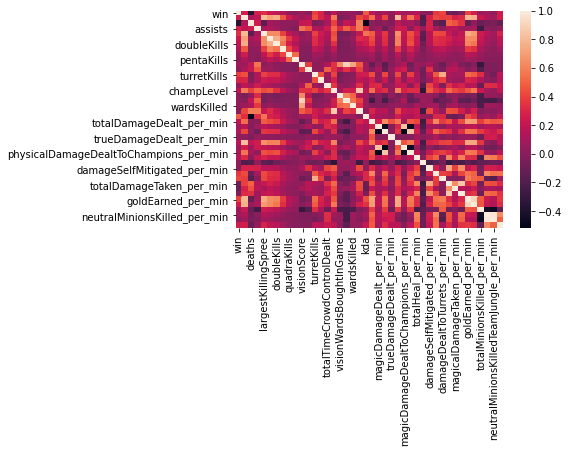

In [6]:
numerical_corr = df[["win"] + numerical_vars].corr()
sns.heatmap(numerical_corr)
numerical_corr

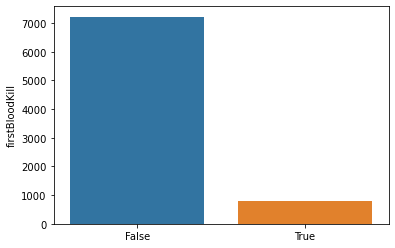

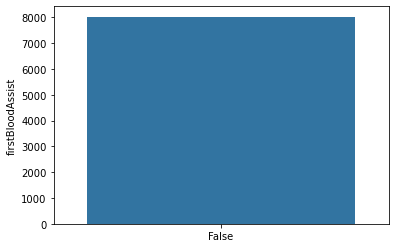

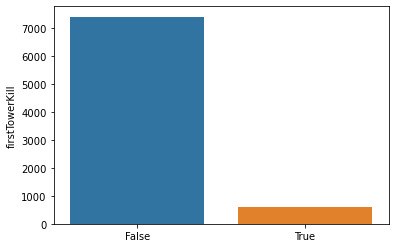

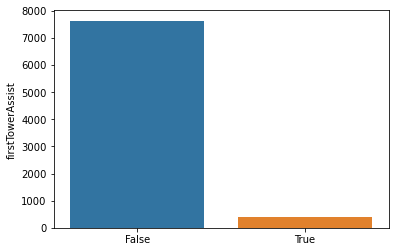

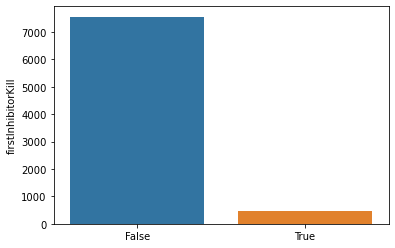

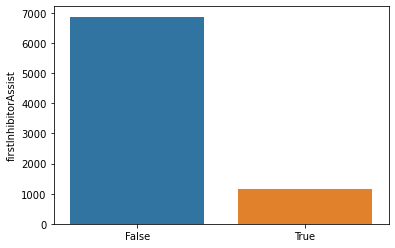

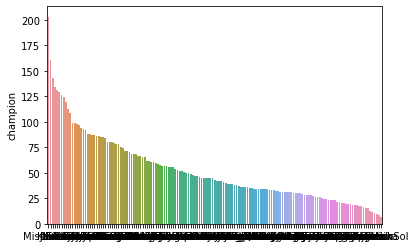

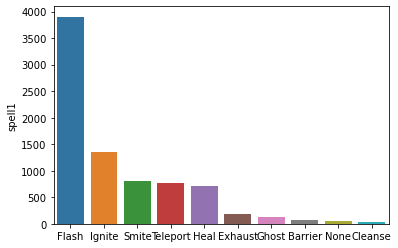

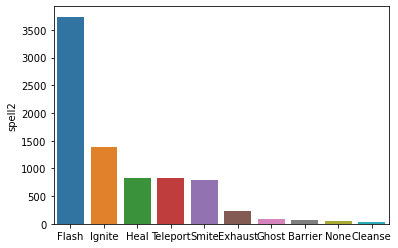

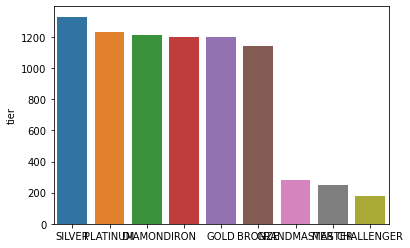

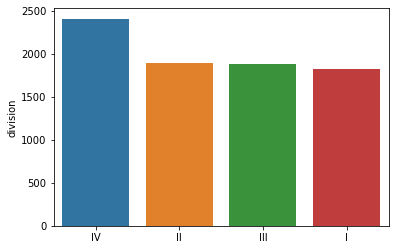

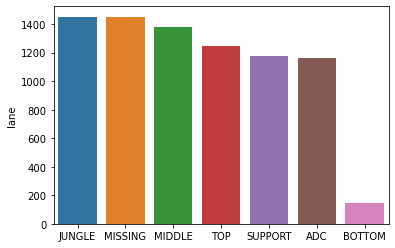

In [7]:
for var in categorical_vars:
    counts = df[var].value_counts()
    sns.barplot(x=counts.index, y=counts)
    plt.show()

In [8]:
pd.pivot_table(df, index = ['firstBloodKill', 'firstBloodAssist'], values='win', aggfunc=['count', np.mean]).sort_values(('count', 'win'), ascending = False)

,,count,mean
,,win,win
firstBloodKill,firstBloodAssist,,
False,False,7223,0.489409
True,False,797,0.595985


In [9]:
pd.pivot_table(df, index = ['firstTowerKill', 'firstTowerAssist'], values='win', aggfunc=['count', np.mean]).sort_values(('count', 'win'), ascending = False)

,,count,mean
,,win,win
firstTowerKill,firstTowerAssist,,
False,False,7014,0.464642
True,False,615,0.734959
False,True,391,0.764706


In [10]:
pd.pivot_table(df, index = ['firstInhibitorKill', 'firstInhibitorAssist'], values='win', aggfunc=['count', np.mean]).sort_values(('count', 'win'), ascending = False)

count      mean
                                          win       win
firstInhibitorKill firstInhibitorAssist                
False              False                 6417  0.393330
                   True                  1141  0.934268
True               False                  462  0.909091

In [11]:
pd.pivot_table(df, index = ['spell1', 'spell2'], values='win', aggfunc=['count', np.mean]).sort_values(('count', 'win'), ascending = False)

count      mean
                    win       win
spell1   spell2                  
Flash    Ignite    1296  0.506173
Ignite   Flash     1287  0.505828
Flash    Heal       791  0.484197
         Teleport   786  0.501272
Teleport Flash      728  0.512363
Smite    Flash      728  0.482143
Flash    Smite      719  0.507650
Heal     Flash      698  0.521490
Flash    Exhaust    190  0.568421
Exhaust  Flash      150  0.473333
Barrier  Flash       66  0.393939
Flash    Barrier     63  0.555556
None     None        50  0.000000
Smite    Ghost       48  0.541667
Ghost    Flash       47  0.489362
         Smite       41  0.512195
Cleanse  Flash       33  0.393939
Flash    Ghost       33  0.454545
Exhaust  Ignite      32  0.406250
Ignite   Exhaust     28  0.464286
         Smite       27  0.555556
Flash    Cleanse     25  0.400000
Teleport Ignite      22  0.590909
Smite    Ignite      22  0.818182
Ignite   Teleport    13  0.538462
Ghost    Heal        12  0.583333
         Ignite      10  0.600000
         Teleport     9  0.555556
Teleport Ghost        8  0.250000
Heal     Exhaust      7  0.428571
         Ignite       6  0.500000
Smite    Teleport     6  0.500000
Teleport Heal         5  0.400000
         Smite        4  1.000000
Exhaust  Heal         4  0.500000
Heal     Teleport     4  0.250000
Barrier  Heal         3  0.000000
Smite    Exhaust      3  0.333333
Ignite   Ghost        2  1.000000
         Heal         2  0.500000
Ghost    Exhaust      2  0.500000
Smite    Heal         2  1.000000
Cleanse  Ghost        2  0.000000
Barrier  Ignite       1  0.000000
Ignite   Barrier      1  0.000000
Teleport Barrier      1  0.000000
Exhaust  Smite        1  0.000000
Heal     Ghost        1  0.000000
Ghost    Barrier      1  1.000000